# Exploration on Ford GoBike System Data
## by Junghoon Suk

## Investigation Overview

> The goal of this presentation is to explore trip duration of a bike rental service (Bay Wheels) and share findings for discussion.

## Dataset Overview

> Ford GoBike System Data is used to discover individual trip information of a bike-sharing system. The dataset is limited to the Greater Sanfrancisco Bay Area for the period of June 2020 only.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike_cleaned = pd.read_csv('bike_cleaned.csv')
print(bike_cleaned.info())
bike_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153319 entries, 0 to 153318
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ride_id        153319 non-null  object 
 1   rideable_type  153319 non-null  object 
 2   started_at     153319 non-null  object 
 3   ended_at       153319 non-null  object 
 4   member_casual  153319 non-null  object 
 5   duration_min   153319 non-null  float64
 6   date_rented    153319 non-null  int64  
 7   day_rented     153319 non-null  object 
 8   time_rented    153319 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 10.5+ MB
None


,ride_id,rideable_type,started_at,ended_at,member_casual,duration_min,date_rented,day_rented,time_rented
0,08A4A9F7315901F3,electric_bike,2020-06-03 16:37:10,2020-06-03 16:48:28,casual,11.300000,3,Wednesday,16
1,844F9D906468C441,electric_bike,2020-06-03 12:22:47,2020-06-03 12:44:02,casual,21.250000,3,Wednesday,12
2,0E441BF8A86C544E,electric_bike,2020-06-02 17:37:43,2020-06-02 17:52:21,casual,14.633333,2,Tuesday,17
3,CAFE64864422F475,electric_bike,2020-06-02 18:13:01,2020-06-02 18:48:30,casual,35.483333,2,Tuesday,18
4,172957A20160D568,electric_bike,2020-06-03 15:16:06,2020-06-03 16:06:10,casual,50.066667,3,Wednesday,15


In [5]:
# transforming dtypes of some features
bike_cleaned['rideable_type'] = bike_cleaned['rideable_type'].astype('category')
bike_cleaned['member_casual'] = bike_cleaned['member_casual'].astype('category')
bike_cleaned['time_rented'] = bike_cleaned['time_rented'].astype('category')

# transforming 'day_rented' into category datatype
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_category = pd.api.types.CategoricalDtype(categories = day_order)
bike_cleaned['day_rented'] = bike_cleaned['day_rented'].astype(day_category)

In [4]:
# final check on the dataframe 'bike_cleaned'
bike_cleaned.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,duration_min,date_rented,day_rented,time_rented
0,08A4A9F7315901F3,electric_bike,2020-06-03 16:37:10,2020-06-03 16:48:28,casual,11.300000,3,Wednesday,16
1,844F9D906468C441,electric_bike,2020-06-03 12:22:47,2020-06-03 12:44:02,casual,21.250000,3,Wednesday,12
2,0E441BF8A86C544E,electric_bike,2020-06-02 17:37:43,2020-06-02 17:52:21,casual,14.633333,2,Tuesday,17
3,CAFE64864422F475,electric_bike,2020-06-02 18:13:01,2020-06-02 18:48:30,casual,35.483333,2,Tuesday,18
4,172957A20160D568,electric_bike,2020-06-03 15:16:06,2020-06-03 16:06:10,casual,50.066667,3,Wednesday,15


## `1.` How long does bike rental last?

Bike rental duration is measured by minute. 

Log scale is applied as the distribution of trip duration is extremely skewed to right.

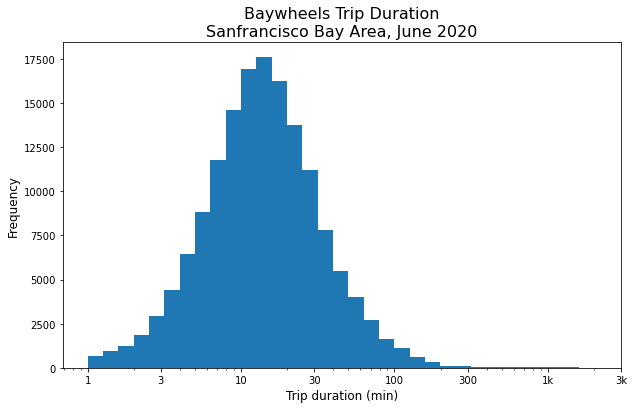

In [11]:
log_data = np.log10(bike_cleaned['duration_min'])
bin_edges = 10 ** np.arange(0, log_data.max() + 0.1, 0.1)

plt.figure(figsize = [10,6])

plt.hist(bike_cleaned['duration_min'], bins = bin_edges);
plt.xscale('log');
tick_prop = [1, 3, 10, 30, 100, 300, 1000, 3e3]
tick_label = ['1', '3', '10', '30', '100', '300', '1k', '3k']
plt.xticks(tick_prop, tick_label);

plt.title('Baywheels Trip Duration\nSanfrancisco Bay Area, June 2020', fontsize = 16)
plt.xlabel('Trip duration (min)', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12);

The median trip duration is around 14 minutes, with over 75% of the rentals last 24 minutes.

The recent pricing policy says  
> single rides start at USD 2 for the first 30 minutes, then USD 2 per additional 15 minutes
  (source from the company's website [here]( https://www.lyft.com/bikes/bay-wheels/pricing)
  
It suggests that users prefer renting bikes from Bay Wheels for a quick ride only.

## `2.` Which type of bike is rented more frequently by users?



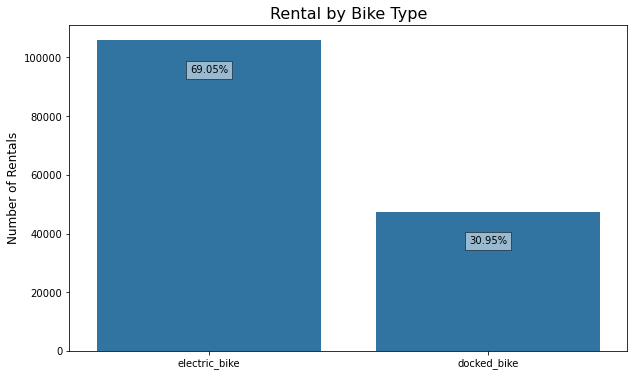

In [25]:
n_total = bike_cleaned.shape[0]
btype_counts = bike_cleaned['rideable_type'].value_counts()
btype_order = btype_counts.index

plt.figure(figsize = [10, 6])
base_color = sns.color_palette()[0]

sns.countplot(bike_cleaned['rideable_type'], color = base_color, order = btype_order); 
plt.xlabel('')
plt.ylabel('Number of Rentals', fontsize = 12)
plt.title('Rental by Bike Type', fontsize = 16);

for i in range(btype_counts.shape[0]):
    count = btype_counts.values[i]
    pct_string = '{:0.2f}%'.format(100 * count / n_total)
    plt.text(i, count - 10000, pct_string, va = 'center', ha = 'center',
             bbox = dict(facecolor='white', alpha=0.5)) 

Of the two available bike types, electric bikes were rented more than docked bikes. 

## `3.` How long is trip duration per bike type, across days of week?


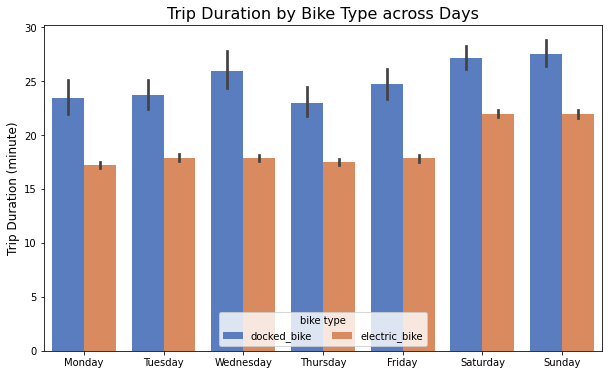

In [26]:
plt.figure(figsize = [10, 6])

sns.barplot(data = bike_cleaned, x = 'day_rented', y = 'duration_min', 
            hue = 'rideable_type', palette = 'muted')
plt.legend(loc = 8, ncol = 3, framealpha = 0.8, title = 'bike type')
plt.xlabel('')
plt.ylabel('Trip Duration (minute)', fontsize = 12)
plt.title('Trip Duration by Bike Type across Days', fontsize = 16);

In the previous finding, we understood that electric bikes are rented more frequently than docked bikes.

However, it is apparent that docked bike has longer trip duration than electric bikes, and the trend is consistent across days. 

Side note | Both docked and electric bike have slightly longer duration on weekends than weekdays.

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!